In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importer les packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from matplotlib.colors import ListedColormap
%matplotlib inline
# Import fonction ACP
from sklearn.decomposition import PCA


In [3]:
# Charger la base de données
df=pd.read_csv('/content/drive/MyDrive/Kaggle/CO2 Emissions_Canada.csv')

In [4]:
pd.set_option('display.max_columns', 12)

In [5]:
# Affichage des 5 premières lignes
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.shape

(7385, 12)

In [7]:
# Affichage des 5 dernières lignes
df.tail()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [8]:
# Informations des colonnes exemples :type de chaque variable , valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [9]:
# Statistiques des variables numériques
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


**1-Nettoyage des données**

In [10]:
# Nombre de lignes en doublon
df.duplicated().sum()

1103

In [11]:
# Supprimer les doublons (inplace=True:pour appliquer à la base de données)
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(6282, 12)

In [14]:
df['Make'].value_counts()

FORD             577
CHEVROLET        515
BMW              501
MERCEDES-BENZ    365
PORSCHE          296
GMC              289
TOYOTA           276
AUDI             263
NISSAN           213
MINI             200
JEEP             200
KIA              192
VOLKSWAGEN       187
HYUNDAI          184
DODGE            180
HONDA            164
CADILLAC         141
LEXUS            129
MAZDA            127
SUBARU           119
JAGUAR           118
VOLVO            118
BUICK             92
INFINITI          87
LINCOLN           81
LAND ROVER        76
MITSUBISHI        73
RAM               72
CHRYSLER          64
FIAT              56
MASERATI          52
ACURA             51
ROLLS-ROYCE       48
ASTON MARTIN      39
LAMBORGHINI       37
BENTLEY           35
SCION             21
ALFA ROMEO        19
GENESIS           14
SMART              7
SRT                2
BUGATTI            2
Name: Make, dtype: int64

In [15]:
df.groupby('Make').count()

,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Make,,,,,,,,,,,
ACURA,51,51,51,51,51,51,51,51,51,51,51
ALFA ROMEO,19,19,19,19,19,19,19,19,19,19,19
ASTON MARTIN,39,39,39,39,39,39,39,39,39,39,39
AUDI,263,263,263,263,263,263,263,263,263,263,263
BENTLEY,35,35,35,35,35,35,35,35,35,35,35
BMW,501,501,501,501,501,501,501,501,501,501,501
BUGATTI,2,2,2,2,2,2,2,2,2,2,2
BUICK,92,92,92,92,92,92,92,92,92,92,92
CADILLAC,141,141,141,141,141,141,141,141,141,141,141


In [16]:
df['Make'].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [17]:
df['Model'].value_counts()

F-150 FFV             32
F-150 FFV 4X4         31
MUSTANG               27
FOCUS FFV             24
F-150 4X4             20
                      ..
LS 500                 1
LS 500h                1
NX 300 AWD F SPORT     1
RX 350 L AWD           1
XC40 T4 AWD            1
Name: Model, Length: 2053, dtype: int64

In [18]:
# Découverte des valeurs manquantes
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [19]:
# Afficher les colonnes
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

**2 - Analyse exploratoire**

**a-Analyse univariée**

In [20]:
df['Model'].value_counts()

F-150 FFV             32
F-150 FFV 4X4         31
MUSTANG               27
FOCUS FFV             24
F-150 4X4             20
                      ..
LS 500                 1
LS 500h                1
NX 300 AWD F SPORT     1
RX 350 L AWD           1
XC40 T4 AWD            1
Name: Model, Length: 2053, dtype: int64

In [21]:
df['Model'].unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], dtype=object)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6282 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6282 non-null   object 
 1   Model                             6282 non-null   object 
 2   Vehicle Class                     6282 non-null   object 
 3   Engine Size(L)                    6282 non-null   float64
 4   Cylinders                         6282 non-null   int64  
 5   Transmission                      6282 non-null   object 
 6   Fuel Type                         6282 non-null   object 
 7   Fuel Consumption City (L/100 km)  6282 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 10  Fuel Consumption Comb (mpg)       6282 non-null   int64  
 11  CO2 Emissions(g/km)               6282 non-null   int64  
dtypes: flo

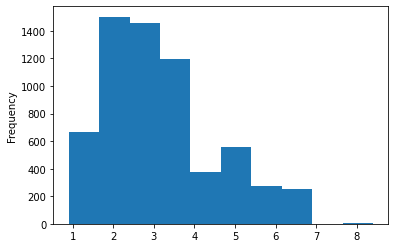

In [23]:
df['Engine Size(L)'].plot(kind='hist')

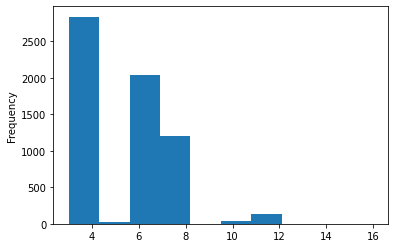

In [24]:
df['Cylinders'].plot(kind='hist')

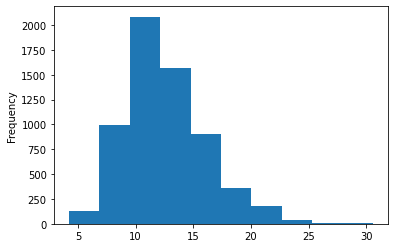

In [25]:
df['Fuel Consumption City (L/100 km)'].plot(kind='hist')

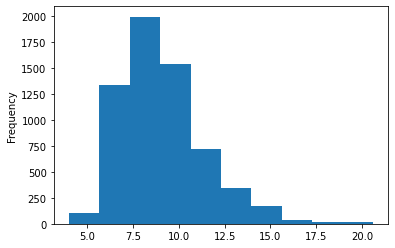

In [26]:
df['Fuel Consumption Hwy (L/100 km)'].plot(kind='hist')

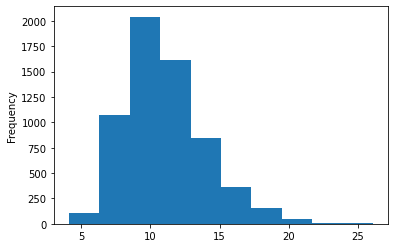

In [27]:
df['Fuel Consumption Comb (L/100 km)'].plot(kind='hist')

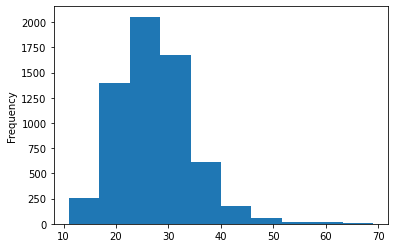

In [28]:
df['Fuel Consumption Comb (mpg)'].plot(kind='hist')

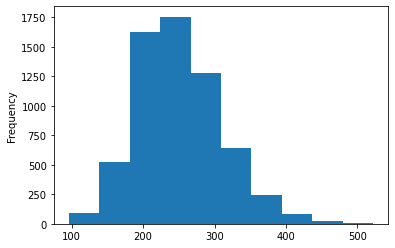

In [29]:
df['CO2 Emissions(g/km)'].plot(kind='hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda3b078520>,
      dtype=object)

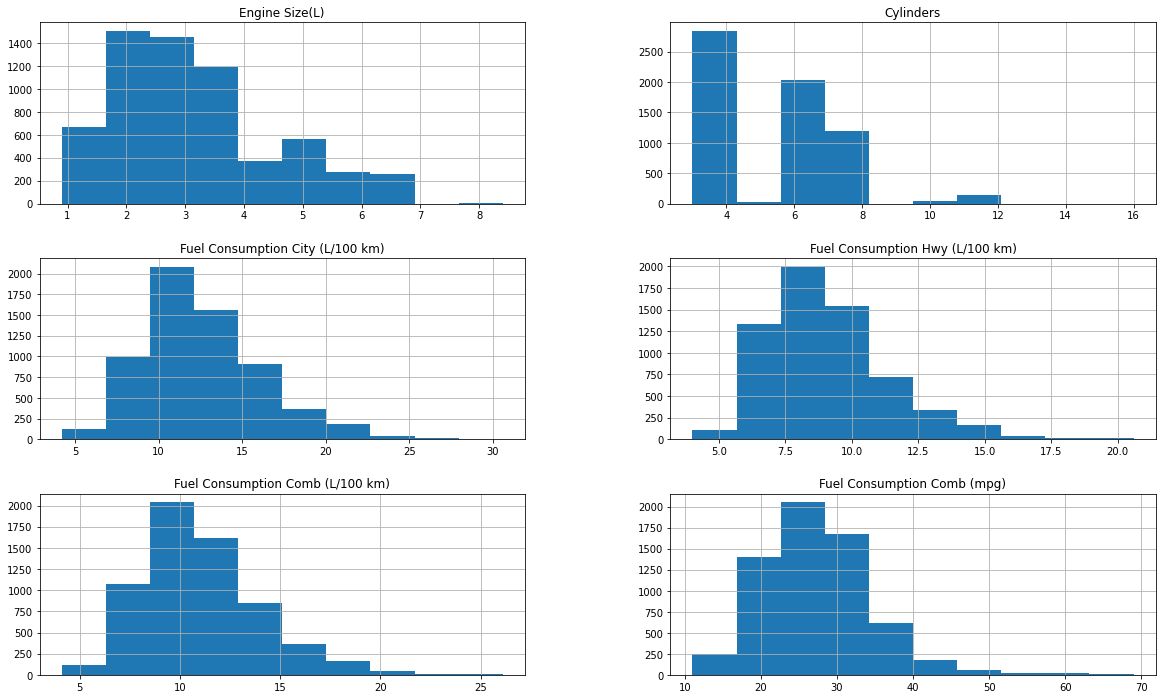

In [30]:
df[["Engine Size(L)","Cylinders","Fuel Consumption City (L/100 km)","Fuel Consumption Hwy (L/100 km)",
    "Fuel Consumption Comb (L/100 km)", "Fuel Consumption Comb (mpg)"]].hist(figsize=(20,12))

**b- Analyse bivariée**

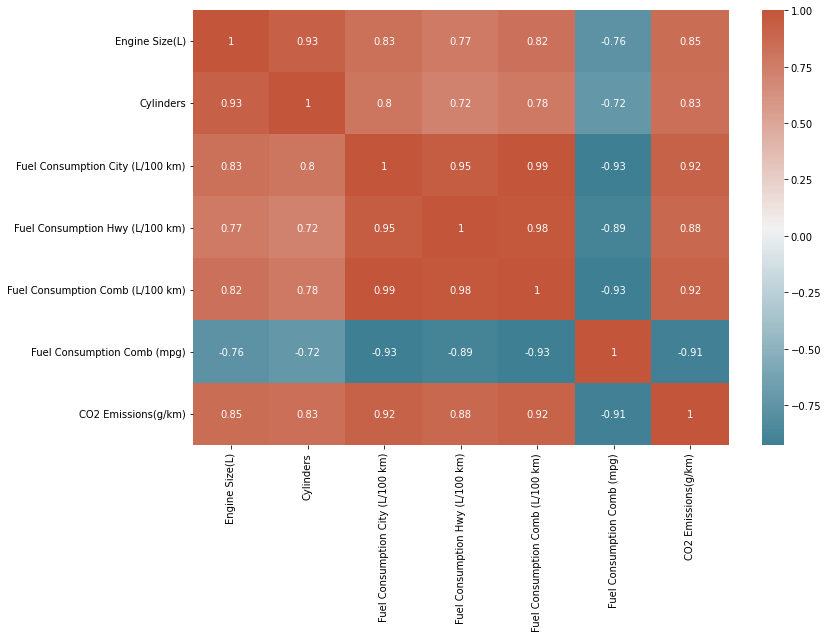

In [31]:
plt.figure(figsize=(12,8))
corr=df.corr()
sns.heatmap(corr , xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220,20,as_cmap=True))

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6282 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6282 non-null   object 
 1   Model                             6282 non-null   object 
 2   Vehicle Class                     6282 non-null   object 
 3   Engine Size(L)                    6282 non-null   float64
 4   Cylinders                         6282 non-null   int64  
 5   Transmission                      6282 non-null   object 
 6   Fuel Type                         6282 non-null   object 
 7   Fuel Consumption City (L/100 km)  6282 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 10  Fuel Consumption Comb (mpg)       6282 non-null   int64  
 11  CO2 Emissions(g/km)               6282 non-null   int64  
dtypes: flo

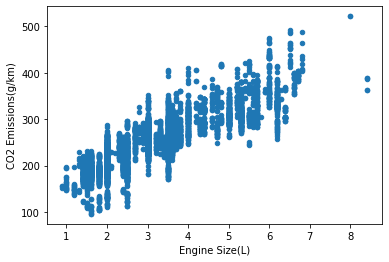

In [33]:
df.plot(kind='scatter', x="Engine Size(L)", y="CO2 Emissions(g/km)")

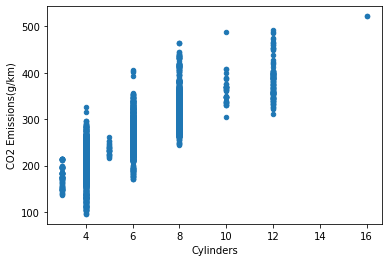

In [34]:
df.plot(kind='scatter', x="Cylinders", y="CO2 Emissions(g/km)")

In [35]:
#plt.scatter(df["Cylinders"], df["CO2 Emissions(g/km)"])

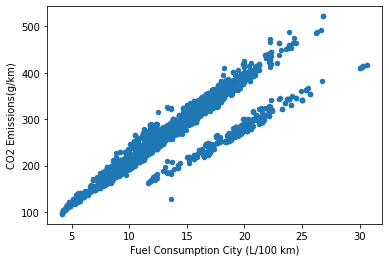

In [36]:
df.plot(kind='scatter', x="Fuel Consumption City (L/100 km)", y="CO2 Emissions(g/km)")

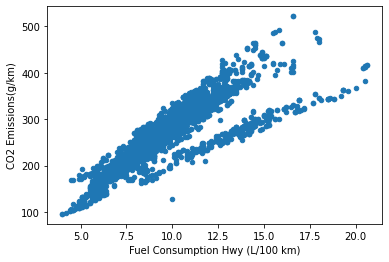

In [37]:
df.plot(kind='scatter', x="Fuel Consumption Hwy (L/100 km)", y="CO2 Emissions(g/km)")

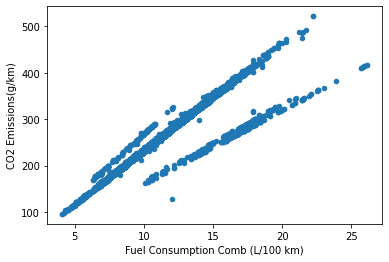

In [38]:
df.plot(kind='scatter', x="Fuel Consumption Comb (L/100 km)", y="CO2 Emissions(g/km)")

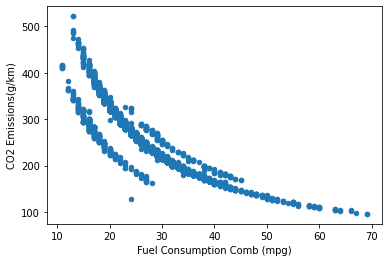

In [39]:
df.plot(kind='scatter', x="Fuel Consumption Comb (mpg)", y="CO2 Emissions(g/km)")

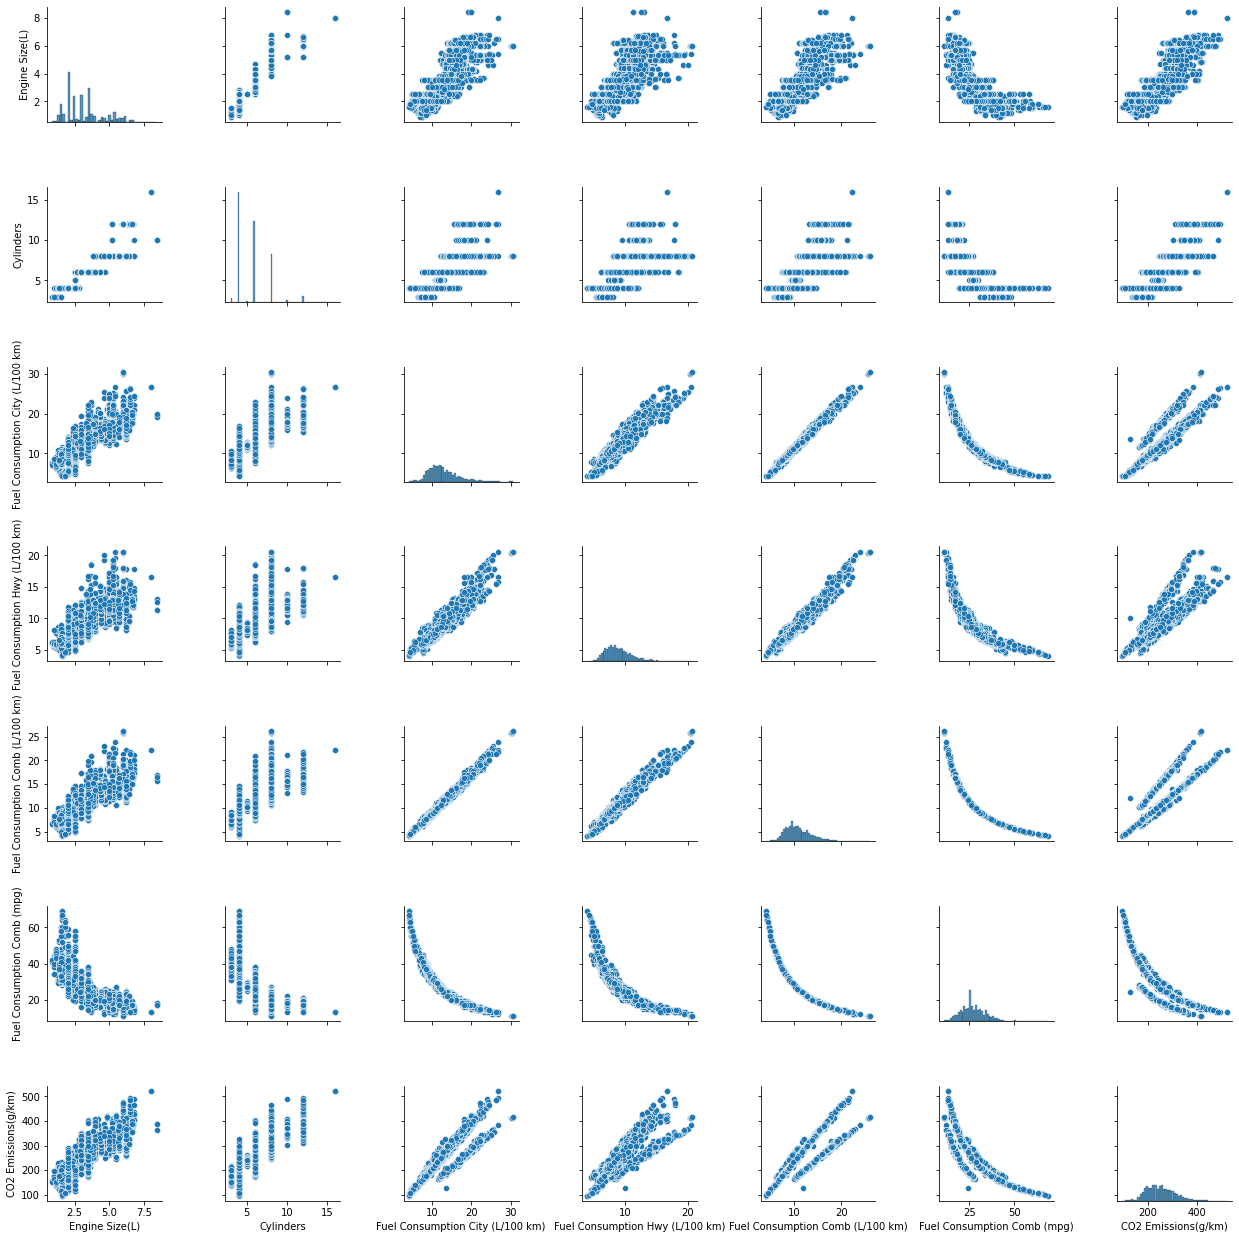

In [40]:
#scatter plots
data=df[["Engine Size(L)","Cylinders","Fuel Consumption City (L/100 km)","Fuel Consumption Hwy (L/100 km)",
    "Fuel Consumption Comb (L/100 km)", "Fuel Consumption Comb (mpg)","CO2 Emissions(g/km)"]]
sns.pairplot(data)

**Q1: Quel genre de véhicule génère le plus de CO2 ?**

In [41]:
#plt.figure(figsize=(18,30))
#df_genre_revenue=df.groupby(['Model'])["CO2 Emissions(g/km)"].mean()
#df_genre_revenue.plot(kind='bar')

**K Mean Clustering**

In [42]:
# Définir notre variable dépendante y et nos varaibles indépendantes X
y = df['CO2 Emissions(g/km)']
x = df.drop('CO2 Emissions(g/km)', axis=1)

In [43]:
x

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27
...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29


In [44]:
y

0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2 Emissions(g/km), Length: 6282, dtype: int64

**WCCS (Elbow Method=méthode du coude) permet de mesurer la pertinence du clustering. Somme des carrés intercluster. En gros, pour chaque cluster on prend le carré de la somme des distances de chaque point par rapport au centroid. Ensuite on fait la somme de ces carrés et on ontient notre mesure. L'objectif c'est de minimiser cette valeur mais raisonnablement ... Si WCSS est trop grand c'est que je n'ai pas assez de Cluster. Si il est trop petit c'est que j'en ai trop.**

In [45]:
encoder = OneHotEncoder()

In [46]:
x = encoder.fit_transform(x)

In [47]:
# Utiliser la méthode elbow pour trouver le nombre optimal de clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

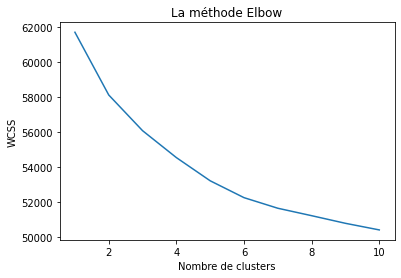

In [48]:
# Afficher la courbe de la méthode Elbow
plt.plot(range(1, 11), wcss)
plt.title('La méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
#Cluster K-means
kmeans=KMeans(n_clusters=3)
#adapter le modèle de données
kmeans.fit(x)

KMeans(n_clusters=3)

In [59]:
 kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [60]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0069116 , 0.00472899, 0.        , ..., 0.00072754, 0.00036377,
        0.00072754],
       [0.01633486, 0.00306279, 0.01990812, ..., 0.        , 0.        ,
        0.        ]])

In [52]:
# The lowest SSE value
kmeans.inertia_

56086.060392915504

In [53]:
 # The number of iterations required to converge
kmeans.n_iter_

6

In [54]:
y_pred = kmeans.predict(x)

In [55]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y_pred == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 6282 out of 6282 samples were correctly labeled.


In [56]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 1.00


In [57]:
df['cluster']=y_pred
df.head

<bound method NDFrame.head of        Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission  ... Fuel Consumption City (L/100 km)  \
0             AS5  ...                              9.9   

Text(0, 0.5, 'CO2 Emissions(g/km)')

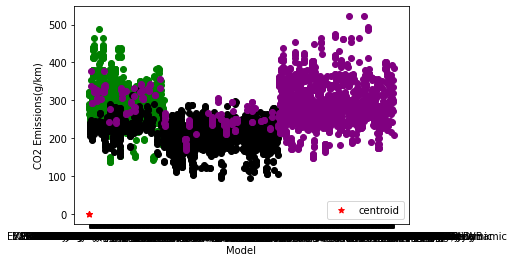

In [58]:
#plt.figure(figsize=(12,8))

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]


plt.scatter(df1.Model, df1['CO2 Emissions(g/km)'], color='green')
plt.scatter(df2.Model, df2['CO2 Emissions(g/km)'], color='black')
plt.scatter(df3.Model, df3['CO2 Emissions(g/km)'], color='purple')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],color='red', marker='*', label='centroid')
plt.legend()

plt.xlabel('Model')
plt.ylabel('CO2 Emissions(g/km)')
